In [2]:
#installing dependencies
!pip install pandas requests
import pandas as pd
import requests
from io import StringIO

In [3]:
#urls of my own repo with copy of csv files 
malaria_deaths_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_deaths.csv'
malaria_deaths_age_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_deaths_age.csv'
malaria_inc_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_inc.csv'

In [4]:
#downloading of csv files

response = requests.get(malaria_deaths_url)
response.raise_for_status()

response2 = requests.get(malaria_deaths_age_url)
response2.raise_for_status()

response3 = requests.get(malaria_inc_url)
response3.raise_for_status

<bound method Response.raise_for_status of <Response [200]>>

In [5]:
#creating of dataframes 

malaria_deaths_csv_data = StringIO(response.text)
malaria_deaths_df = pd.read_csv(malaria_deaths_csv_data)

malaria_deaths_age_csv_data = StringIO(response2.text)
malaria_deaths_age_df = pd.read_csv(malaria_deaths_age_csv_data)

malaria_inc_csv_data = StringIO(response3.text)
malaria_inc_df = pd.read_csv(malaria_inc_csv_data)

# EDA

In [12]:
#first dataset

malaria_deaths_df.head()

,Entity,Code,Year,"Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)"
0,Afghanistan,AFG,1990,6.802930
1,Afghanistan,AFG,1991,6.973494
2,Afghanistan,AFG,1992,6.989882
3,Afghanistan,AFG,1993,7.088983
4,Afghanistan,AFG,1994,7.392472


In [10]:
malaria_deaths_df.tail()

,Entity,Code,Year,"Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)"
6151,Zimbabwe,ZWE,2012,9.751727
6152,Zimbabwe,ZWE,2013,9.419939
6153,Zimbabwe,ZWE,2014,9.487453
6154,Zimbabwe,ZWE,2015,9.440046
6155,Zimbabwe,ZWE,2016,9.507309


In [18]:
#number of unique countries in dataset 

unique_country = malaria_deaths_df['Entity'].nunique()
print(unique_country)

228


In [13]:
#second dataset

malaria_deaths_age_df.head()

,Unnamed: 0,entity,code,year,age_group,deaths
0,1,Afghanistan,AFG,1990,Under 5,184.606435
1,2,Afghanistan,AFG,1991,Under 5,191.658193
2,3,Afghanistan,AFG,1992,Under 5,197.140197
3,4,Afghanistan,AFG,1993,Under 5,207.357753
4,5,Afghanistan,AFG,1994,Under 5,226.209363


In [11]:
malaria_deaths_age_df.tail()

,Unnamed: 0,entity,code,year,age_group,deaths
30775,30776,Zimbabwe,ZWE,2012,50-69,103.185111
30776,30777,Zimbabwe,ZWE,2013,50-69,100.113293
30777,30778,Zimbabwe,ZWE,2014,50-69,99.013890
30778,30779,Zimbabwe,ZWE,2015,50-69,98.091738
30779,30780,Zimbabwe,ZWE,2016,50-69,97.402058


In [14]:
#third dataset

malaria_inc_df.head()

,Entity,Code,Year,"Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)"
0,Afghanistan,AFG,2000,107.100000
1,Afghanistan,AFG,2005,46.500000
2,Afghanistan,AFG,2010,23.900000
3,Afghanistan,AFG,2015,23.600000
4,Algeria,DZA,2000,0.037746


# Visualizations 

In [20]:
#import dependencies

import matplotlib.pyplot as plt

# Average Incideces over Years

In [25]:
#group by years

avg_incidences_years = malaria_inc_df.groupby('Year')['Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)'].mean().reset_index()

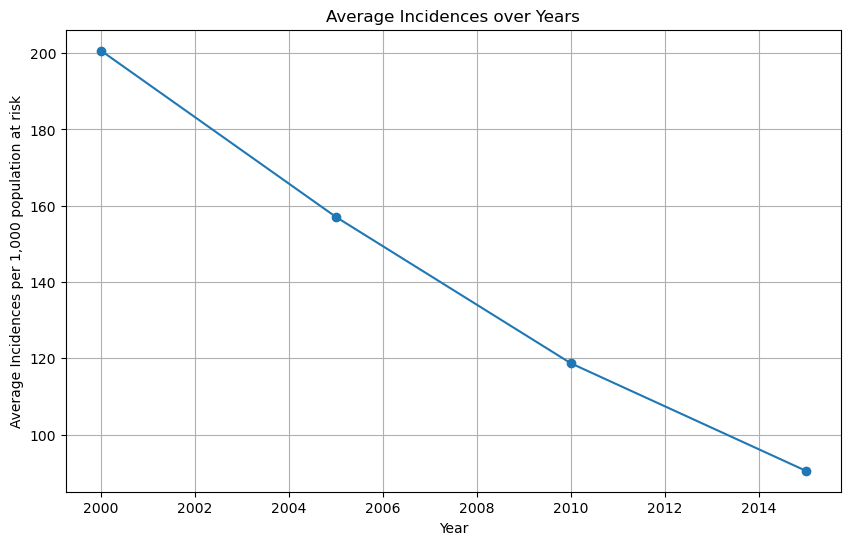

In [26]:
#plotting 

plt.figure(figsize=(10, 6))
plt.plot(avg_incidences_years['Year'], avg_incidences_years['Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)'], marker='o')
plt.title('Average Incidences over Years')
plt.xlabel('Year')
plt.ylabel('Average Incidences per 1,000 population at risk')
plt.grid(True)
plt.show()

# Average Death rate over Years

In [22]:
#group by years

avg_death_rate_years = malaria_deaths_df.groupby('Year')['Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)'].mean().reset_index()

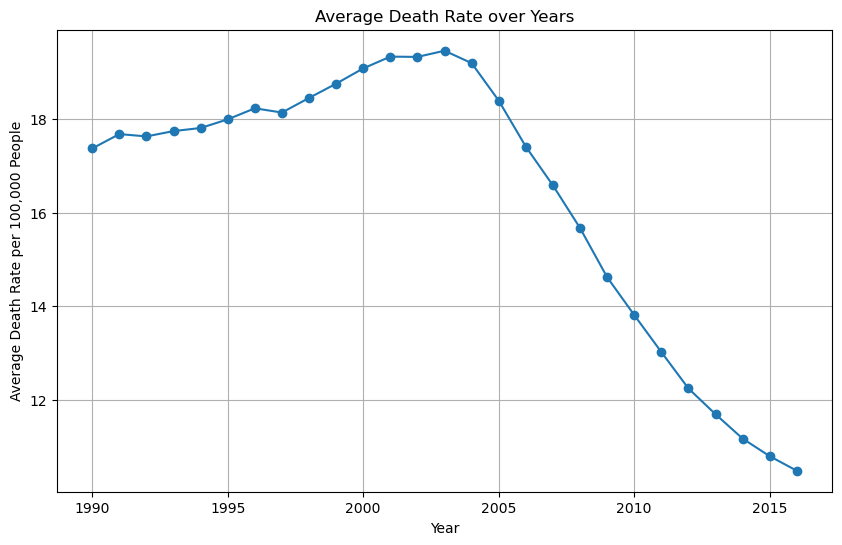

In [24]:
#plotting 

plt.figure(figsize=(10, 6))
plt.plot(avg_death_rate_years['Year'], avg_death_rate_years['Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)'], marker='o')
plt.title('Average Death Rate over Years')
plt.xlabel('Year')
plt.ylabel('Average Death Rate per 100,000 People')
plt.grid(True)
plt.show()

# Total Deaths Per Year

In [27]:
#group by years

total_deaths_years = malaria_deaths_age_df.groupby('year')['deaths'].sum().reset_index()

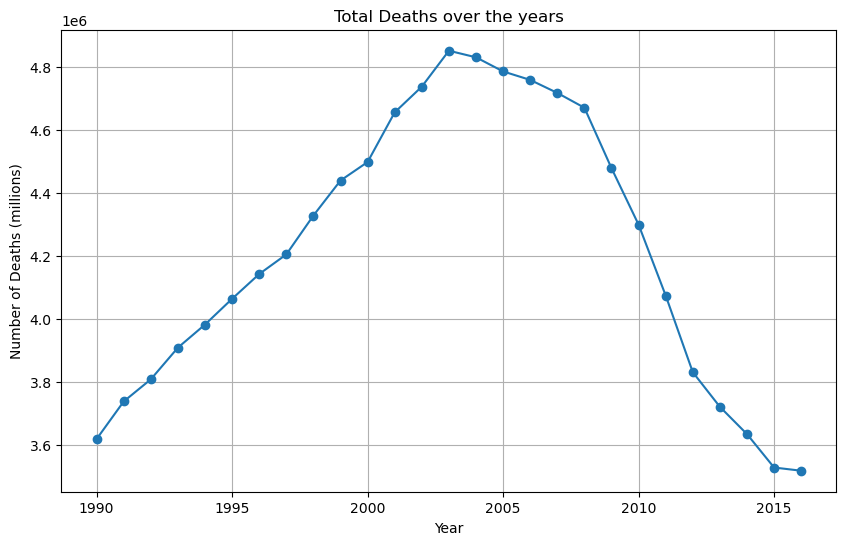

In [29]:
#plotting 

plt.figure(figsize=(10, 6))
plt.plot(total_deaths_years['year'], total_deaths_years['deaths'], marker='o')
plt.title('Total Deaths over the years')
plt.xlabel('Year')
plt.ylabel('Number of Deaths (millions)')
plt.grid(True)
plt.show()